LAB 7
-

1) Plot the surface J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2. Also, generated the corresponding contour plot. Label the plots appropriately. Give a suitable title for the figure.

In [67]:
import matplotlib.pyplot as plt

In [68]:
import numpy as np

Text(0.5, 0, 'z')

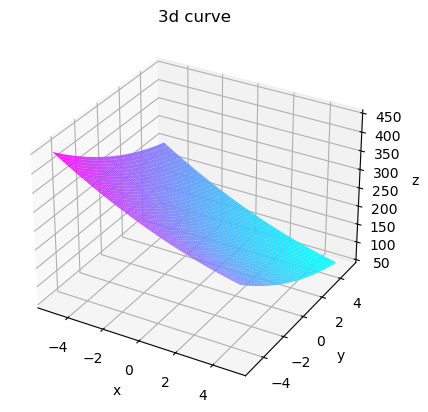

In [100]:
w1 = np.linspace(-5, 5, 100)
w2 = np.linspace(-5, 5, 100)
w1, w2 = np.meshgrid(w1, w2)
J = (w1 - 10)**2 + (w2 - 10)**2

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(w1, w2, J, cmap='cool')
ax.set_title('3d curve')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Text(0, 0.5, 'y')

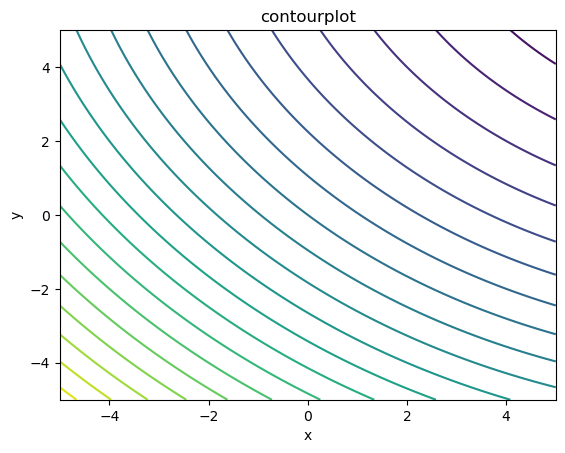

In [103]:
fig = plt.figure()
ax = plt.axes()
ax.contour(w1, w2, J, levels = 20)
ax.set_title('contourplot')
ax.set_xlabel('x')
ax.set_ylabel('y')

Q2

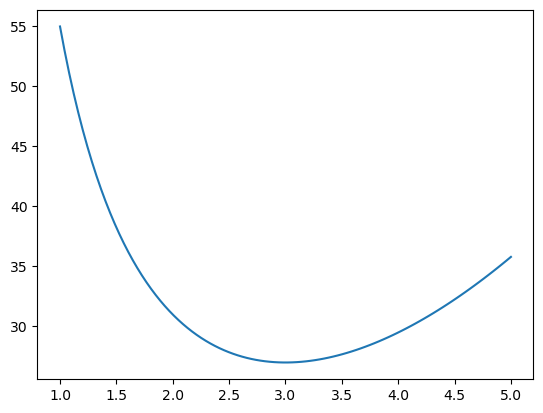

In [107]:
x = np.linspace(1,5, 100)

y = x**2 + 54/x
plt.plot(x,y)
plt.show()

In [108]:
def J(w):
    return w**2 + 54/w

In [109]:
def dJ(w):
    return 2*w - 54/w**2

def ddJ(w):
    return 2 + 108/w**3


In [110]:
def Bracketing(a, b, n):
    dw = (b-a)/n
    w1 = a
    w2 = w1 + dw
    w3 = w2 + dw
    while(w3 <= b):
        if ddJ(w1) > 0:
            if J(w1) >= J(w2) <= J(w3):
                a, b = w1, w3
                return a, b
            else:
                w1 = w2
                w2 = w3
                w3 = w2 + dw
        elif ddJ(w1) < 0:
            if J(w1) <= J(w2) >= J(w3):
                a, b = w1, w3
                return a, b
            else:
                w1 = w2
                w2 = w3
                w3 = w2 + dw

In [111]:
a, b, n = 1, 5, 10
Bracketing(a, b, n)

(2.5999999999999996, 3.3999999999999995)

In [112]:
def Elimination(a, b, ep):
    L = b - a
    while(abs(L)> ep):
        wm = (a + b)/2
        w1 = a + L/4
        w2 = b - L/4
        if ddJ(w1) > 0:
            if(J(w1) < J(wm)):
                b = wm
                wm = w1
            else:
                a = wm
                wm = w2
            L = b - a
        elif ddJ(w1) < 0:
            if(J(w1) > J(wm)):
                b = wm
                wm = w1
            else:
                a = wm
                wm = w2
            L = b - a
    return a, b, J(a)

In [113]:
Elimination(a, b, 0.0001)

(3.00625, 3.006304931640625, 27.000117025077962)

In [114]:
def NewtonRaphson(w, ep):
    dJk_new = dJ(w)
    while(abs(dJk_new) > ep):
        wk_new = w - dJ(w)/ddJ(w)
        dJk_new = dJ(wk_new)
        w = wk_new
    return w

In [115]:
NewtonRaphson(1, 0.001)

2.999999931328473

Q3

In [116]:
# Q3
def J(w):
    return np.sin(w)

def dJ(w):
    return np.cos(w)

def ddJ(w):
    return -1*np.sin(w)

In [117]:
a, b = Bracketing(0.0001, np.pi, 10)
a, b

(1.2566970614359172, 1.8849955921538757)

In [118]:
critical_ele = Elimination(a, b, 0.001)
critical_ele

(1.5708463267948964, 1.5714598995788007, 0.99999999875)

In [121]:
critical_new = NewtonRaphson(1, 0.001)

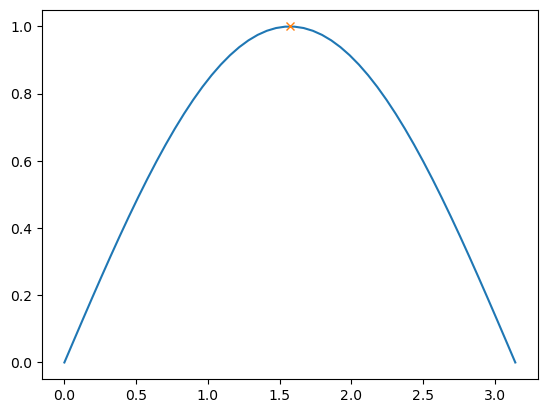

In [127]:
plt.figure()
x = np.linspace(0, np.pi)
y = np.sin(x)
plt.plot(x, y)
plt.plot(critical_new, np.sin(critical_new), 'x')

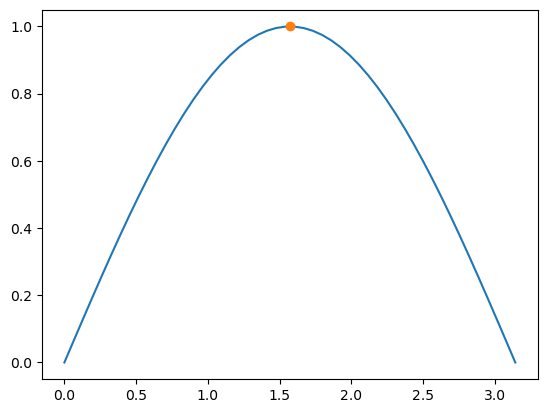

In [128]:
plt.figure()
x = np.linspace(0, np.pi)
y = np.sin(x)
plt.plot(x, y)

plt.plot(critical_ele[0], np.sin(critical_ele[0]), 'o')